In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

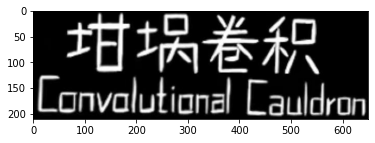

In [45]:
watermark = cv2.imread('./IMG_0669.JPG', cv2.IMREAD_UNCHANGED)[780:990, 220:870, :]
watermark = cv2.bitwise_not(watermark)
plt.imshow(watermark)

In [193]:
# for a given postion, if the pixel is black, set alpha channel=0, else alpha=chosen level
def make_png(img_path, alpha):
    """
    for a given black and white jpeg image, turn the black background to completely transparent
    turn the white characters into alpha channel=alpha
    """
    img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)[780:990, 220:870, :]
    img = cv2.bitwise_not(img)
    plt.imshow(img)
    rgba = cv2.cvtColor(img, cv2.COLOR_RGB2RGBA)
    rgba[:, :, 3] = 0
    # preprocess the image
    plt.imshow(rgba)
    #rgba[(rgba[:, :,  0] < 1) | (rgba[:, :, 1]<1) | (rgba[:, :, 2]<1)] = 0
    rgba[rgba[:, :,  0] + rgba[:, :, 1] + rgba[:, :, 2] >90] = 100
    
    return rgba

True

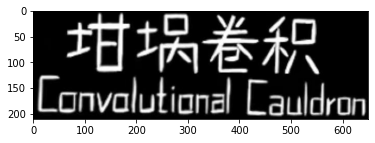

In [194]:
tmp = make_png('./IMG_0669.JPG', 50)
cv2.imwrite('./new_test.png', tmp)

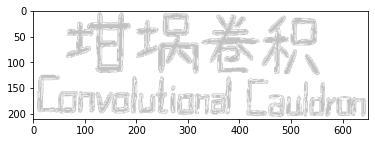

In [195]:
plt.imshow(tmp)

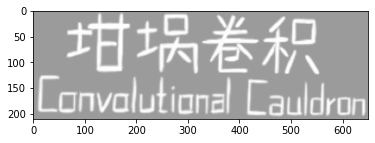

In [196]:
rgba = cv2.cvtColor(watermark, cv2.COLOR_RGB2RGBA)
rgba[:, :, 3] = 100
plt.imshow(rgba)

In [31]:
rgba

array([[[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  1,   1,   1, 100],
        [  1,   1,   1, 100],
        [  1,   1,   1, 100],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       [[  1,   1,   1, 100],
        [  1,   1,   1, 100],
        [  1,   1,   1, 100],
        ...,
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0]],

       ...,

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  1,   1,   1, 100],
        [  1,   1,   1, 100],
        [  1,   1,   1, 100]],

       [[  0,   0,   0,   0],
        [  0,   0,   0,   0],
        [  0,   0,   0,   0],
        ...,
        [  1,   1,   1, 100],
        [  1,   1,   1, 100],
        [  1,   1,   1, 100]],

       [[  0

In [158]:
B, G, R, A = cv2.split(rgba)
B = cv2.bitwise_and(B, B, mask=A)
G = cv2.bitwise_and(G, G, mask=A)
R = cv2.bitwise_and(R, R, mask=A)
rgba = cv2.merge([B, G, R, A])

In [159]:
cv2.imwrite('./test_2.png', rgba)

True

In [201]:
img = cv2.imread('./DSC00049.JPG')
(h, w) = img.shape[:2]
img = np.dstack([img, np.ones((h, w), dtype='uint8') * 255])
overlay = np.zeros((h, w, 4), dtype='uint8')
(wH, wW) = rgba.shape[:2]
overlay[h - wH - 10:h - 10, w-wW-10:w-10] = tmp

In [202]:
output = img.copy()
result = cv2.addWeighted(overlay, 0.2, output, 1, 0.0)

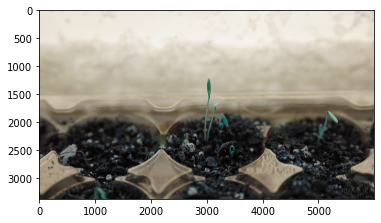

In [203]:
plt.imshow(result)

In [204]:
cv2.imwrite('./result_sprouts.JPG', result)

True